In [1]:
###: Importing H2O Library

In [2]:
import h2o

In [3]:
### : Initializing h2O

In [4]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 19 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_avkashchauhan_8r3asb
H2O cluster total nodes:,1
H2O cluster free memory:,3.256 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [5]:
### : Getting H2O Cluster status

In [6]:
h2o.cluster().show_status()

H2O cluster uptime:,2 hours 19 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_avkashchauhan_8r3asb
H2O cluster total nodes:,1
H2O cluster free memory:,3.256 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing Dataset

In [8]:
df = h2o.import_file("/Users/avkashchauhan/src/github.com/avkash/mldl/data/titanic_list.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Dataset

In [10]:
df.describe()

Rows:1309
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,int,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,0.0,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.294881589,0.381970970206,NaN,,29.8811345124,0.498854087089,0.385026737968,249039.136886,33.2954792813,,,9.40452261307,160.809917355,
maxs,3.0,1.0,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.83783601897,0.486055170866,NaN,,14.4134996999,1.0416583906,0.86556027535,442685.317677,51.7586682392,,,4.3574169836,97.696921996,
zeros,0,809,0,,0,891,1002,0,17,,,0,0,
missing,0,0,0,0,263,0,0,352,1,1014,2,911,1188,564
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [11]:
###: Understanding Dataset with pylab library

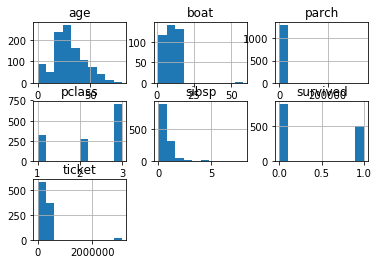

In [12]:
import pylab as pl
pl.figure(figsize=(20,10))
df.as_data_frame().hist()
pl.show()

In [13]:
###: Getting a list of columns in our dataset

In [14]:
df.col_names

[u'pclass',
 u'survived',
 u'name',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'ticket',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body',
 u'home.dest']

In [15]:
###: Setting Response column

In [16]:
response = "survived"

In [17]:
###: Setting Response column to factor so we can get unique values in it

In [18]:
df['survived'].asfactor().levels()

[['0', '1']]

In [ ]:
###: Understanding Dataset with Seaborn python library using origin as color pclass

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

import seaborn as sns
sns.set_context("notebook")

## Error due to NAs

sns.pairplot(df.as_data_frame(), vars=["embarked", "survived"], hue="pclass");
plt.show()

In [19]:
###: Setting Response column to factor so we can build classification model

In [20]:
df[response] = df[response].asfactor()

In [21]:
###: Verifying Response column as factor 

In [22]:
df[response].describe()

Rows:1309
Cols:1




,survived
type,enum
mins,
mean,
maxs,
sigma,
zeros,
missing,0
0,1
1,1
2,0


In [23]:
###: Setting all columns/features into a local variable

In [24]:
features = df.col_names

In [25]:
###: Settings all features for model building

In [26]:
features.remove(response)
print(features)

[u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [27]:
###: Ignoring list of features which are not required for model building

In [28]:
ignore_list = ['name', 'ticket', 'home.dest']
for x in ignore_list:
    features.remove(x)
print(features)    

[u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare', u'cabin', u'embarked', u'boat', u'body']


In [29]:
###: Importing H2O Deep Learning library

In [30]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [31]:
###: Setting H2O Deep Learning model configuration (default)

In [32]:
dl_titanic_basic = H2ODeepLearningEstimator()

In [33]:
###: Training H2O Deep Learning Model 

In [34]:
dl_titanic_basic.train(x = features, y = response,training_frame=df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [35]:
###: Understanding H2O Deep Learning Model overall performance based on training data

In [36]:
dl_titanic_basic.model_performance(train=True)


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0951216697075
RMSE: 0.308418011322
LogLoss: 0.3511155895
Mean Per-Class Error: 0.0826872682324
AUC: 0.970814585909
Gini: 0.941629171817
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0549610493875: 


,0,1,Error,Rate
0,782.0,27.0,0.0334,(27.0/809.0)
1,66.0,434.0,0.132,(66.0/500.0)
Total,848.0,461.0,0.071,(93.0/1309.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0549610,0.9032258,256.0
max f2,0.0138322,0.9195845,325.0
max f0point5,0.1511710,0.9416509,207.0
max accuracy,0.0887209,0.9289534,239.0
max precision,0.9999950,1.0,0.0
max recall,0.0004612,1.0,395.0
max specificity,0.9999950,1.0,0.0
max absolute_mcc,0.0887209,0.8501166,239.0
max min_per_class_accuracy,0.0268353,0.9085290,295.0
max mean_per_class_accuracy,0.0549610,0.9173127,256.0


Gains/Lift Table: Avg response rate: 38.20 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106952,0.9999999,2.618,2.618,1.0,1.0,0.028,0.028,161.8,161.8
,2,0.0206264,0.9999991,2.618,2.618,1.0,1.0,0.026,0.054,161.8,161.8
,3,0.0305577,0.9999973,2.618,2.618,1.0,1.0,0.026,0.08,161.8,161.8
,4,0.0404889,0.9999888,2.618,2.618,1.0,1.0,0.026,0.106,161.8,161.8
,5,0.0504202,0.9999793,2.618,2.618,1.0,1.0,0.026,0.132,161.8,161.8
,6,0.1000764,0.9991672,2.618,2.618,1.0,1.0,0.13,0.262,161.8,161.8
,7,0.1504966,0.9902929,2.618,2.618,1.0,1.0,0.132,0.394,161.8,161.8
,8,0.2001528,0.9187698,2.618,2.618,1.0,1.0,0.13,0.524,161.8,161.8
,9,0.3002292,0.1758940,2.5380611,2.5913537,0.9694656,0.9898219,0.254,0.778,153.8061069,159.1353690
,10,0.4048892,0.0268544,1.3376642,2.2672868,0.5109489,0.8660377,0.14,0.918,33.7664234,126.7286792


In [37]:
###: Understanding H2O Deep Learning Model - AUC Model metrics based on training data

In [38]:
dl_titanic_basic.model_performance(train=True).auc()

0.9708145859085291

In [39]:
###: Setting H2O Deep Learning model configuration to use cross validation with 5 folds

In [40]:
dl_titanic_cv = H2ODeepLearningEstimator(nfolds = 5 )

In [41]:
###: Training H2O Deep Learning Model

In [42]:
dl_titanic_cv.train(x = features, y = response,training_frame=df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [43]:
###: Understanding H2O Deep Learning Model overall performance based on cross validation data (r2 only)

In [44]:
dl_titanic_cv.model_performance(xval=True).auc()

0.9358331273176762

In [45]:
###: Plotting H2O Deep Learning Model for its AUC metric 

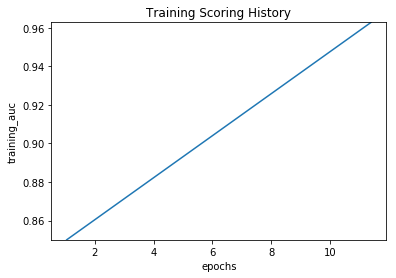

In [46]:
dl_titanic_cv.plot(metric='auc')

In [47]:
###: Generating H2O Deep Learning 

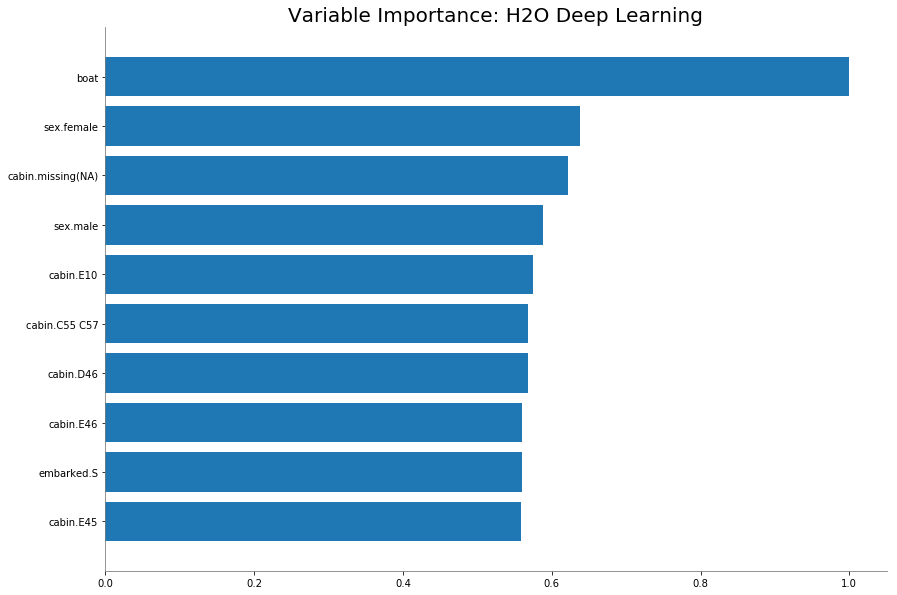

In [48]:
dl_titanic_cv.varimp_plot()

In [49]:
###: Setting H2O Deep Learning model configuration to use cross validation with 5 folds and various other parameters
###: for tuning the performance and accuracy

In [50]:
dl_titanic_cv_tuned = H2ODeepLearningEstimator(nfolds = 5,
                                           hidden = [30],
                                           epochs = 25,
                                           train_samples_per_iteration=20,
                                           score_training_samples=50,
                                           activation="Rectifier",
                                           adaptive_rate = False,
                                           seed = 12345)
# default activation works best this data #
# adaptive_rate = False works best for this data (True will reduce the accuracy) #
# hidden layers [20] or [30] works better then [10,10] or multiple levels #

In [51]:
###: Training H2O Deep Learning Model 

In [52]:
dl_titanic_cv_tuned.train(x = features, y = response, training_frame=df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [53]:
###: Understanding H2O Deep Learning Model overall performance based on cross validation data (AUC only)

In [54]:
print(dl_titanic_basic.model_performance(train=True).auc())
print(dl_titanic_cv.model_performance(xval=True).auc())
print(dl_titanic_cv_tuned.model_performance(xval=True).auc())

0.970814585909
0.935833127318
0.940716934487


In [55]:
###:  H2O Deep Learning Tuned model varialbe importance plot

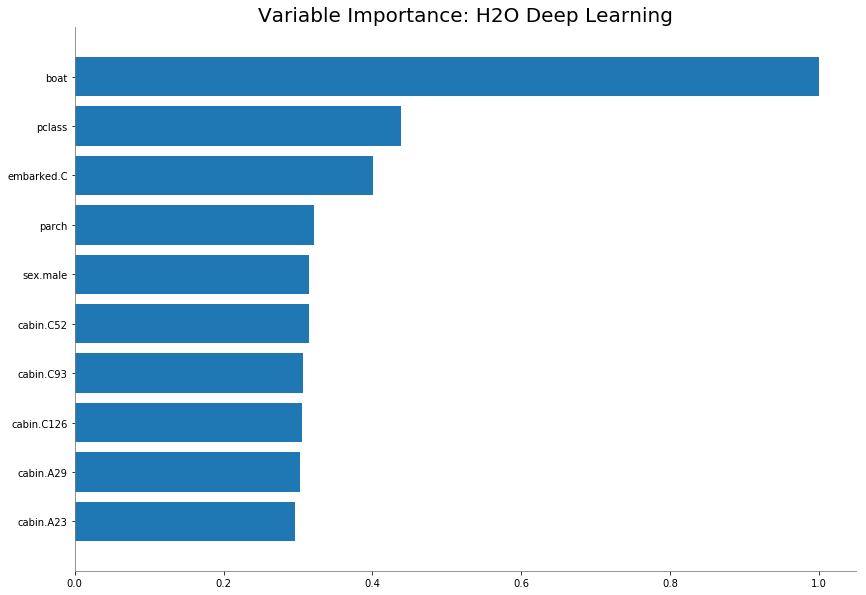

In [56]:
dl_titanic_cv_tuned.varimp_plot()

In [57]:
###:  H2O Deep Learning Tuned model varialbe importance plot

In [58]:
dl_titanic_cv_tuned.score_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
0,,2017-11-16 11:04:12,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN
1,,2017-11-16 11:04:12,2.839 sec,10500 obs/sec,0.016043,1,21.0,0.460783,0.672897,0.777586,2.45,0.285714
2,,2017-11-16 11:04:13,3.882 sec,31448 obs/sec,25.009931,1658,32738.0,0.225973,0.200719,0.950000,2.45,0.040816


In [59]:
dl_titanic_cv_tuned.scoring_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
0,,2017-11-16 11:04:12,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN
1,,2017-11-16 11:04:12,2.839 sec,10500 obs/sec,0.016043,1,21.0,0.460783,0.672897,0.777586,2.45,0.285714
2,,2017-11-16 11:04:13,3.882 sec,31448 obs/sec,25.009931,1658,32738.0,0.225973,0.200719,0.950000,2.45,0.040816


In [60]:
### PERFORMING PREDICTIONS USING a TEST DATA SET

In [61]:
###: listing features used for model building from the original data set

In [62]:
features

[u'pclass',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body']

In [63]:
###: listing first 3 rows from the original data set

In [64]:
df.head(3).describe()

Rows:3
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.9167,0.0,0.0,24160.0,151.55,,,2.0,NaN,
mean,1.0,,NaN,,10.6389,0.666666666667,1.33333333333,83907.3333333,171.479166667,,,6.5,0.0,
maxs,1.0,,NaN,,29.0,1.0,2.0,113781.0,211.3375,,,11.0,NaN,
sigma,0.0,,NaN,,15.9104016175,0.57735026919,1.15470053838,51742.708475,34.5183292192,,,6.36396103068,-0.0,
zeros,0,,0,,0,1,1,0,0,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,1,3,0
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [65]:
###: creating test data set based on features used for building model

In [66]:
df_test = h2o.H2OFrame.from_python({"pclass":2, "sex" : 'male', "age" : 28, 
                                    "sibsp" : 1, "parch" : 2, "fare" : 321.9, "boat": 2, 'body' : 123,
                                   "embarked" : 'S', "cabin": "B5"})

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [67]:
type(df_test)

h2o.frame.H2OFrame

In [68]:
###: Performing prediction using one of the best deep learning model we built earlier

In [69]:
dl_titanic_cv_tuned.predict(df_test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,p0,p1
1,0.000116972,0.999883


In [70]:
###: Looking at the histogram of response variable from original data set

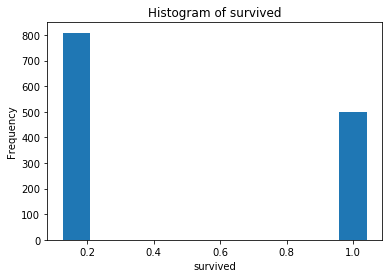

In [71]:
df[response].asnumeric().hist()